# Clustering

## Part One: Tutorial on only 2 features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

/Users/anthonymoubarak/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import dataset

df = pd.read_csv('/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Data/final_df.csv')

In [3]:
# The two features to be used for demonstrating this method will are speechiness and instrumentalness 

X = df[['speechiness' , 'instrumentalness']]




In [4]:
from sklearn.preprocessing import StandardScaler

object= StandardScaler()

X_scaled = object.fit_transform(X) 


In [5]:
# Check how many clusters to use for the KNN model (based on inertia and distortion at each number)

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

n_clusters = []
inertia = []
distortion = []
K = range(2,11)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_scaled)
    kmeanModel.fit(X_scaled)
    distortion.append(sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_scaled.shape[0])
    n_clusters.append(k)
    inertia.append(kmeanModel.inertia_)


# Save results to a dataframe

clustering_results = pd.DataFrame({'n_of_clusters':n_clusters , 'Inertia':inertia, 'Distortion':distortion})

clustering_results

,n_of_clusters,Inertia,Distortion
0,2,5161.897754,0.695795
1,3,1879.763671,0.401738
2,4,1342.469800,0.315414
3,5,918.813684,0.288395
4,6,721.739279,0.251400
5,7,589.088306,0.230810
6,8,488.190920,0.206242
7,9,423.790203,0.188712
8,10,352.202942,0.169459


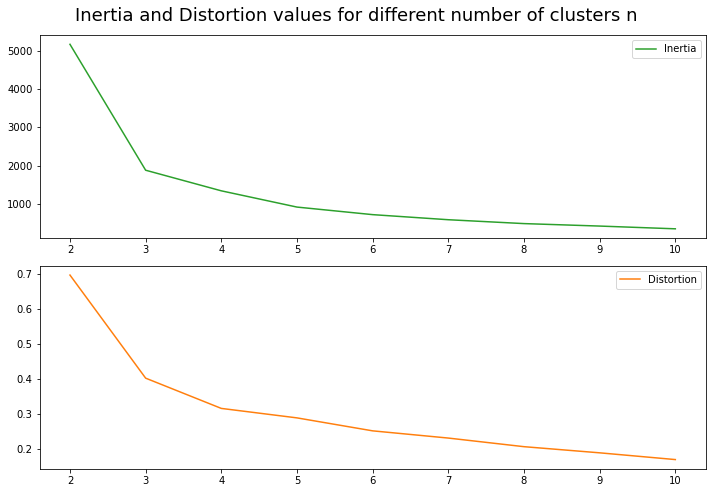

In [17]:
#plt.figure(figsize=(12,6))
fig , axs = plt.subplots(2, 1, figsize = (10,8))
axs[0].plot(clustering_results['n_of_clusters'], clustering_results['Inertia'] , 'tab:green')
axs[1].plot(clustering_results['n_of_clusters'], clustering_results['Distortion'] , 'tab:orange')
axs[0].legend([('Inertia')],loc="upper right")
axs[1].legend([('Distortion')],loc="upper right")
fig.suptitle('Inertia and Distortion values for different number of clusters n' , fontsize = 18)
fig.tight_layout(rect=[0, 0.13, 1, 1])
 

Using the elbow method, k=3 is the best number of clusters to use for this method.

In [18]:
# Fit the model with k = 3 clusters
kmeanModel = KMeans(n_clusters=3).fit(X_scaled)
kmeanModel.fit(X_scaled)
y_kmeans = kmeanModel.fit_predict(X)


# Add a column to my dataset that assigns each data point with a cluster 

X['cluster'] = y_kmeans

/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_25967/2384682599.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = y_kmeans


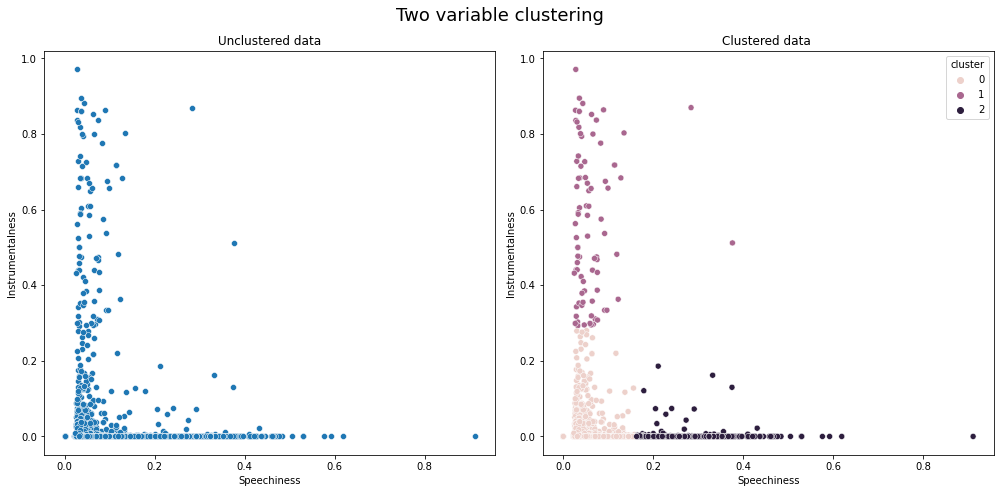

In [23]:
# Barplots for each of the above 

fig, axs = plt.subplots(1 , 2, figsize=(14, 8))
ax1 = sns.scatterplot(data=X, x="speechiness", y="instrumentalness", ax= axs[0])
ax2 = sns.scatterplot(data=X, x="speechiness", y="instrumentalness", hue="cluster", ax = axs[1])
fig.tight_layout(pad=5.0)
ax1.title.set_text("Unclustered data")
ax2.title.set_text("Clustered data ")
ax1.set_xlabel('Speechiness')
ax2.set_xlabel('Speechiness')
ax1.set_ylabel('Instrumentalness')
ax2.set_ylabel('Instrumentalness')
fig.suptitle('Two variable clustering' , fontsize = 18)
fig.tight_layout(rect=[0, 0.13, 1, 1])
fig.savefig("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/Kmeans_results.png" , facecolor='white')

 

## Part Two: Using more than two features

Part one was used as a sample explanation of k means and to give visual results of how the clustering would work. In reality, i would like to use most of the features i have to do so.

In [24]:
X2 = df[['fog_index','flesch_index', 'num_words', 'num_lines',  'f_k_grade',
       'difficult_words', 'neg',  'danceability',
       'energy', 'loudness',  'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

Single value decomposotion (SVD)

In [25]:
from sklearn.preprocessing import StandardScaler

object= StandardScaler()

X2_scaled = object.fit_transform(X2) 


In [26]:
X2_scaled

array([[-0.21853346, -0.35956603, -0.91244985, ..., -1.00796482,
        -1.05386323, -0.32191369],
       [-0.24790863, -0.41897475, -0.65638653, ..., -1.64268066,
         1.78404344, -0.4734084 ],
       [-0.21853346, -0.35956603, -0.95318719, ..., -1.18873832,
        -1.04927142, -0.71612369],
       ...,
       [ 1.82781437,  4.4380344 , -1.42632235, ..., -0.77496786,
         0.48087412, -0.25784663],
       [ 5.32639719,  2.42386636, -0.87927801, ..., -0.2205958 ,
        -1.11251775, -1.07565781],
       [ 0.79160522,  2.43310567, -1.57355876, ..., -0.99591325,
         0.3454995 , -0.44838146]])

In [27]:
# Check how many clusters to use for the KNN model

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

n_clusters = []
inertia = []
distortion = []
K = range(2,11)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X2_scaled)
    kmeanModel.fit(X2_scaled)
    distortion.append(sum(np.min(cdist(X2_scaled, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X2_scaled.shape[0])
    n_clusters.append(k)
    inertia.append(kmeanModel.inertia_)


# Save results to a dataframe

clustering_results = pd.DataFrame({'n_of_clusters':n_clusters , 'Inertia':inertia, 'Distortion':distortion})

clustering_results

,n_of_clusters,Inertia,Distortion
0,2,62053.061437,3.449462
1,3,53476.775431,3.171025
2,4,48479.464084,3.018951
3,5,44970.123164,2.951048
4,6,42001.547445,2.873195
5,7,39754.331475,2.784801
6,8,37912.253103,2.706948
7,9,35553.293712,2.660384
8,10,33999.188272,2.593167


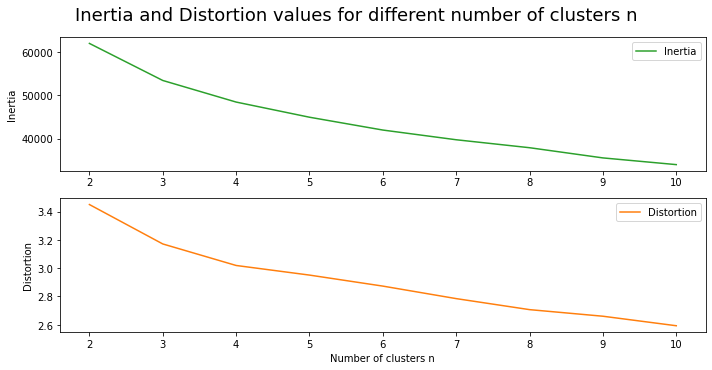

In [31]:
fig , axs = plt.subplots(2, 1, figsize = (10,6))
axs[0].plot(clustering_results['n_of_clusters'], clustering_results['Inertia'] , 'tab:green')
axs[1].plot(clustering_results['n_of_clusters'], clustering_results['Distortion'] , 'tab:orange')
axs[0].legend([('Inertia')],loc="upper right")
axs[1].legend([('Distortion')],loc="upper right")
axs[1].set_xlabel("Number of clusters n")
axs[1].set_ylabel("Distortion")
axs[0].set_ylabel("Inertia")
fig.suptitle('Inertia and Distortion values for different number of clusters n' , fontsize = 18)
fig.tight_layout(rect=[0, 0.13, 1, 1])
fig.savefig("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/elbow_plot.png" , facecolor='white')
 

3 clusters still seems to be the best option

In [32]:
# Fit the model with k = 3 clusters
kmeanModel = KMeans(n_clusters=3).fit(X2_scaled)
kmeanModel.fit(X2_scaled)
y_kmeans = kmeanModel.fit_predict(X2)


# Add a column to my dataset that assigns each data point with a cluster 

X2['cluster'] = y_kmeans

/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_25967/2789875081.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['cluster'] = y_kmeans


In [33]:
# Create a dataframe with the clustered data 
df_knn_clustered = X2
df_knn_clustered

,fog_index,flesch_index,num_words,num_lines,f_k_grade,difficult_words,neg,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,5.20,88.74,145.0,17.00,2.9,13,0.155,0.214,0.194,-15.636,0.0325,0.90300,0.000001,0.1070,0.339,86.198,207573.0,1
1,4.40,82.31,189.0,31.00,3.3,40,0.036,0.358,0.085,-13.664,0.0389,0.93900,0.000000,0.1600,0.181,170.869,198027.0,1
2,5.20,88.74,138.0,16.00,2.9,5,0.053,0.424,0.163,-15.899,0.0276,0.78400,0.000671,0.1160,0.294,86.335,182733.0,2
3,4.40,99.23,117.0,18.00,0.9,10,0.167,0.697,0.182,-12.586,0.0357,0.78000,0.000000,0.1260,0.474,82.184,158000.0,2
4,6.00,69.79,32.0,3.00,6.0,9,0.070,0.631,0.273,-11.538,0.0408,0.80100,0.000000,0.1580,0.633,123.314,190933.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,38.12,381.00,35.7,8.59,35.7,11,0.036,0.623,0.790,-5.070,0.0473,0.11800,0.000000,0.2260,0.694,81.949,187684.0,2
4412,58.34,291.00,54.1,-33.92,54.1,6,0.066,0.659,0.683,-5.623,0.0312,0.51300,0.000005,0.1330,0.397,139.931,203373.0,1
4413,60.93,608.00,56.7,-40.51,56.7,25,0.091,0.878,0.475,-8.420,0.3240,0.00984,0.000000,0.1670,0.397,131.988,211610.0,1
4414,156.21,390.00,150.7,-290.54,150.7,18,0.140,0.550,0.637,-5.212,0.1630,0.59700,0.000000,0.1290,0.535,84.448,160078.0,2


# Part Three: DBSCAN clustering

In [57]:
# Define a hyperparameter optimization function 

def maximize_silhouette(X,algo="birch",nmax=20,i_plot=False):

    # PARAM
    i_print=False

    #FORCE CONTIGUOUS
    X=np.ascontiguousarray(X) 

    # LOOP OVER HYPER-PARAM
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        if(algo=="birch"):
            model = sklearn.cluster.Birch(n_clusters=param).fit(X)
            labels=model.predict(X)

        if(algo=="ag"):
            model = sklearn.cluster.AgglomerativeClustering(n_clusters=param).fit(X)
            labels=model.labels_

        if(algo=="dbscan"):
            param=0.5*(param-1)
            model = sklearn.cluster.DBSCAN(eps=param).fit(X)
            labels=model.labels_

        if(algo=="kmeans"):
            model = sklearn.cluster.KMeans(n_clusters=param).fit(X)
            labels=model.predict(X)

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue 

        if(i_print): print(param,sil_scores[-1])
        
        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels

    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.subplots(figsize=(8,6))
        ax.plot(params, sil_scores, "-o")  
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        ax.set_xlabel("Epsilon")
        fig.suptitle('Silhouette for different value of epsilon' , fontsize = 12)
        fig.savefig("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/HC_elbow.png" , facecolor='white')
        plt.show()

    return opt_labels

OPTIMAL PARAMETER = 6.0


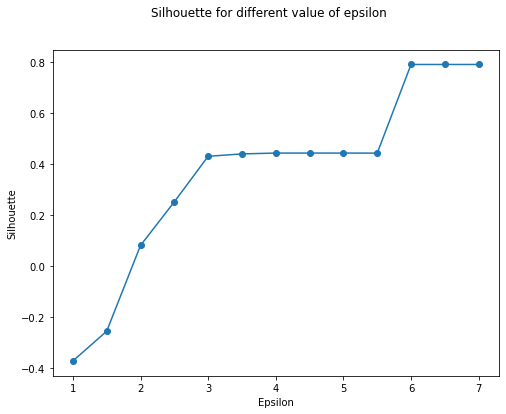

In [58]:
# Run function for DBSCAN

# perform DBSCAN clustering. use the eps and min_samples parameters to find the optimal number of clusters. plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.
from sklearn.metrics import silhouette_samples, silhouette_score

opt_labels=maximize_silhouette(X2_scaled,algo="dbscan",nmax=15, i_plot=True)

 

In [59]:
# Train the optimal DBSCAN  model 

from sklearn.cluster import DBSCAN

optimal_dbscan = sklearn.cluster.DBSCAN(eps=5 , min_samples=5).fit(X2_scaled)

In [60]:
y = optimal_dbscan.fit_predict(X2_scaled)

In [61]:
df_dbscan_clustered = X
df_dbscan_clustered['cluster'] = y
df_dbscan_clustered['cluster'].value_counts()

/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_25967/2956947858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dbscan_clustered['cluster'] = y


 0    4372
 1      41
-1       3
Name: cluster, dtype: int64

# Part Four: Hierarchical Clustering

OPTIMAL PARAMETER = 2


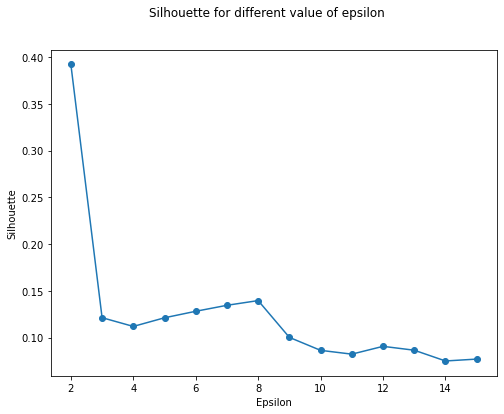

In [62]:
# AGGLOMERATIVE CLUSTERING


opt_labels=maximize_silhouette(X2_scaled,algo="ag",nmax=15, i_plot=True)

In [63]:
from sklearn.cluster import AgglomerativeClustering
hc_model = sklearn.cluster.AgglomerativeClustering(n_clusters=2, compute_distances=True ).fit(X2_scaled)

In [64]:
hc_model.labels_

array([0, 0, 0, ..., 1, 1, 1])

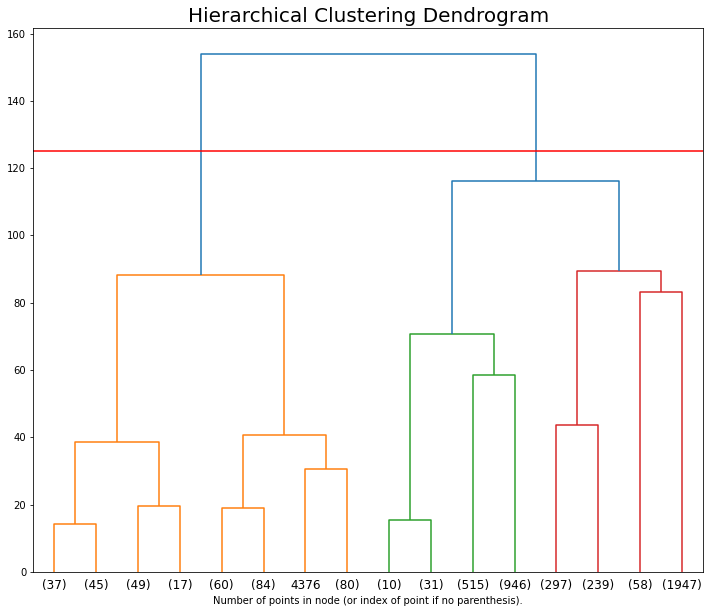

In [86]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on the dendrogram.
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
plt.figure(figsize=(12,10))
plt.title("Hierarchical Clustering Dendrogram" , fontsize = 20)
plot_dendrogram(hc_model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(y = 125, color = 'r', linestyle = '-')
plt.savefig("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/dendogram.png" , facecolor='white')

In [66]:
df_hc_clustered = X
df_hc_clustered['cluster'] = hc_model.labels_
df_hc_clustered

/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_25967/2615444012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hc_clustered['cluster'] = hc_model.labels_


,speechiness,instrumentalness,cluster
0,0.0325,0.000001,0
1,0.0389,0.000000,0
2,0.0276,0.000671,0
3,0.0357,0.000000,0
4,0.0408,0.000000,0
...,...,...,...
4411,0.0473,0.000000,1
4412,0.0312,0.000005,1
4413,0.3240,0.000000,1
4414,0.1630,0.000000,1


# Part Five: Testing for multiple feature combinations (Feature selection)

In [67]:
all_possible_features = ['fog_index','flesch_index', 'num_words', 'num_lines',  'f_k_grade',
       'difficult_words', 'neg',  'danceability',
       'energy', 'loudness',  'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

In [68]:
# Function that returns all subsets of a string
# Credit: https://stackoverflow.com/questions/1482308/how-to-get-all-subsets-of-a-set-powerset
from itertools import chain, combinations

def powerset(seq):
    """
    Returns all the subsets of this set. This is a generator.
    """
    if len(seq) <= 1:
        yield seq
        yield []
    else:
        for item in powerset(seq[1:]):
            yield [seq[0]]+item
            yield item

In [69]:
# Get all possible subsets and remove all subsets with only 1 variable 
r = [x for x in powerset(all_possible_features)]

for i in r:
    if len(i) == 1:
        r.remove(i)
    


In [70]:
# Sort the subusets by cluster legth 
r.sort(key=len)

In [71]:
# Since there thousands of subset, pick just a few to demonstrate the method 
options = [r[1000], r[5000], r[10000],r[30000], r[80000], r[100000], r[130000]]
options

[['num_lines', 'difficult_words', 'valence', 'duration_ms'],
 ['fog_index', 'num_words', 'num_lines', 'neg', 'duration_ms'],
 ['fog_index',
  'flesch_index',
  'danceability',
  'liveness',
  'tempo',
  'duration_ms'],
 ['neg',
  'energy',
  'speechiness',
  'acousticness',
  'liveness',
  'valence',
  'tempo'],
 ['fog_index',
  'flesch_index',
  'num_words',
  'num_lines',
  'danceability',
  'loudness',
  'liveness',
  'valence',
  'tempo'],
 ['fog_index',
  'num_words',
  'f_k_grade',
  'difficult_words',
  'neg',
  'danceability',
  'loudness',
  'instrumentalness',
  'liveness',
  'duration_ms'],
 ['fog_index',
  'flesch_index',
  'num_words',
  'num_lines',
  'f_k_grade',
  'difficult_words',
  'neg',
  'energy',
  'loudness',
  'acousticness',
  'instrumentalness',
  'valence',
  'tempo']]

In [72]:
# Loop over each subset, train knn (k=3) and append inertia for each subset of features 

subset = []

inertia = []


for i in range(0,len(options)):

    subset.append(options[i])

    X = df[options[i]]

    object= StandardScaler()

    X_scaled = object.fit_transform(X) 

    kmeanModel = KMeans(n_clusters=3).fit(X_scaled)

    kmeanModel.fit(X_scaled)
    
    inertia.append(kmeanModel.inertia_)
    

In [73]:
subset_inertia = pd.DataFrame({'Subset':subset , 'Inertia':inertia})

subset_inertia

,Subset,Inertia
0,"[num_lines, difficult_words, valence, duration...",11049.955343
1,"[fog_index, num_words, num_lines, neg, duratio...",11279.412796
2,"[fog_index, flesch_index, danceability, livene...",17105.685061
3,"[neg, energy, speechiness, acousticness, liven...",21903.445492
4,"[fog_index, flesch_index, num_words, num_lines...",25658.906873
5,"[fog_index, num_words, f_k_grade, difficult_wo...",31004.675576
6,"[fog_index, flesch_index, num_words, num_lines...",37079.721760


In [74]:
# Get best feature subset (lowest inertia)

subset_inertia[subset_inertia['Inertia'] == subset_inertia['Inertia'].min()]['Subset'][0]

['num_lines', 'difficult_words', 'valence', 'duration_ms']

# Part Six: Fitting models with best feature subset

In [75]:
# Filter on optimal_subset
optimal_subset = subset_inertia[subset_inertia['Inertia'] == subset_inertia['Inertia'].min()]['Subset'][0]
df_optimal = df[optimal_subset]

In [76]:
from sklearn.preprocessing import StandardScaler

object= StandardScaler()

df_optimal_scaled = object.fit_transform(df_optimal) 

In [77]:
# Train all three models on optimal feature subset 

#Kmeans
kmeanModel_optimal_features = KMeans(n_clusters=3).fit(df_optimal_scaled)
kmeanModel_optimal_features.fit(df_optimal_scaled)

#DBSCAN
dbscan_optimal_features = sklearn.cluster.DBSCAN(eps=5 , min_samples=5).fit(df_optimal_scaled)

#Hierarchical
hc_model_optimal_features = sklearn.cluster.AgglomerativeClustering(n_clusters=2, compute_distances=True ).fit(df_optimal_scaled)

In [78]:
# Pick the hierarchical model since it has the lowest number of clusters 

df_optimal['Clusters'] = kmeanModel_optimal_features.fit_predict(df_optimal_scaled)

/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_25967/1777148525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_optimal['Clusters'] = kmeanModel_optimal_features.fit_predict(df_optimal_scaled)


In [79]:
df_optimal['Clusters'].value_counts()

1    2396
0    1862
2     158
Name: Clusters, dtype: int64

# Part Seven: Result Analysis

In [80]:
df['Clusters'] = df_optimal['Clusters']

In [81]:
# Analyze how both clusters have changed over the years and what differentiates them from each other 

# Convert years to decade 

df['decade'] = ''

for i in range(len(df)):

    if ((df['year'][i] >= 1950) & (df['year'][i] < 1960)):
        df['decade'][i] = "50s"

    elif ((df['year'][i] >= 1960) & (df['year'][i] < 1970)):
        df['decade'][i] = "60s" 

    elif ((df['year'][i] >= 1970) & (df['year'][i] < 1980)):
        df['decade'][i] = "70s" 

    elif ((df['year'][i] >= 1980) & (df['year'][i] < 1990)):
        df['decade'][i] = "80s" 

    elif ((df['year'][i] >= 1990) & (df['year'][i] < 2000)):
        df['decade'][i] = "90s" 

    elif ((df['year'][i] >= 2000) & (df['year'][i] < 2010)):
        df['decade'][i] = "00s" 

    else:
        df['decade'][i] = "2010s"

/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_25967/4003335120.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'][i] = "50s"
/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_25967/4003335120.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'][i] = "60s"
/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_25967/4003335120.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['

In [82]:

# Create a dataframe for each decade 

df_50 = df[df['decade'] == '50s']
df_60 = df[df['decade'] == '60s']
df_70 = df[df['decade'] == '70s']
df_80 = df[df['decade'] == '80s']
df_90 = df[df['decade'] == '90s']
df_00 = df[df['decade'] == '00s']
df_2010 = df[df['decade'] == '2010s']

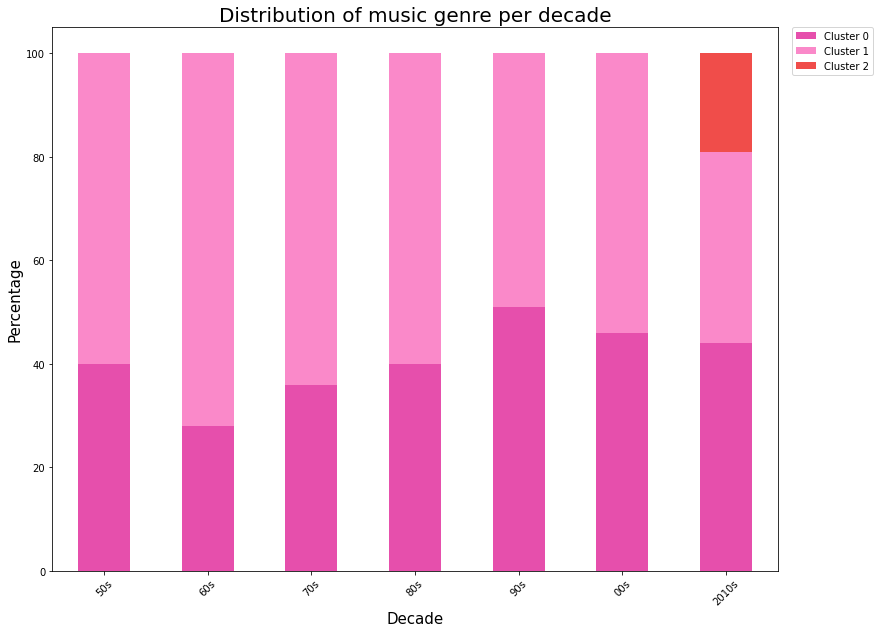

In [85]:
# Create a dataframe of cluster distribution per decade

cluster_distribution = pd.DataFrame({'Decade': ['50s' , '60s' , "70s", "80s", "90s", "00s", "2010s"],
'Cluster 0': [40 , 28, 36, 40, 51, 46, 44],
'Cluster 1': [60 , 72, 64, 60, 49, 54, 37],
'Cluster 2': [0,0,0,0,0,0,19]})


cluster_distribution.plot(kind='bar', stacked=True, color=['#e64fac', '#fa89c9', '#f04d4a' , 'darkorange', 'darkgreen' ,
 'darkcyan', 'silver'], figsize=(13,10))
 # Add Title and Labels
plt.title('Distribution of music genre per decade', fontsize = 20)
plt.xlabel('Decade' , fontsize = 15)
plt.ylabel('Percentage' , fontsize = 15)
x = [0 ,1, 2, 3, 4, 5, 6]
labels = ['50s', '60s', '70s', '80s', '90s', '00s' , '2010s']
plt.xticks(x, labels, rotation = 45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/Results.png" , facecolor='white')

In [50]:
# Understand the attributes of each cluster 

cluster0 = df[df['Clusters'] == 0]
cluster1 = df[df['Clusters'] == 1]
cluster2 = df[df['Clusters'] == 2]


In [51]:
# Keep only the audio features related columns 

audio_columns = [ 'danceability',
       'energy', 'loudness',  'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'Clusters']

cluster0 = cluster0[audio_columns]
cluster1 = cluster1[audio_columns]
cluster2 = cluster2[audio_columns]


In [52]:
# Normalize all the cluster datasets 
cluster0.iloc[:,0:-1] = cluster0.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
cluster1.iloc[:,0:-1] = cluster1.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
cluster2.iloc[:,0:-1] = cluster2.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

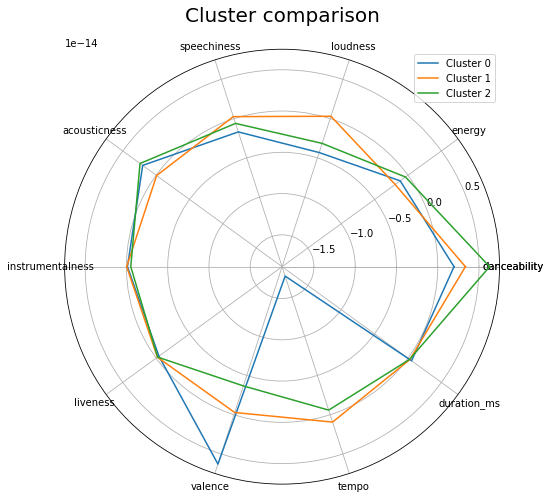

In [55]:
categories = ['danceability',
       'energy', 'loudness',  'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
categories = [*categories, categories[0]]

cluster_1 = [cluster1['danceability'].mean(), cluster1['energy'].mean(), cluster1['loudness'].mean(), cluster1['speechiness'].mean(), cluster1['acousticness'].mean(),
cluster1['instrumentalness'].mean(), cluster1['liveness'].mean(), cluster1['valence'].mean(), cluster1['tempo'].mean(), cluster1['duration_ms'].mean()]

cluster_2 = [cluster2['danceability'].mean(), cluster2['energy'].mean(), cluster2['loudness'].mean(), cluster2['speechiness'].mean(), cluster2['acousticness'].mean(),
cluster2['instrumentalness'].mean(), cluster2['liveness'].mean(), cluster2['valence'].mean(), cluster2['tempo'].mean(), cluster2['duration_ms'].mean()]

cluster_0 = [cluster0['danceability'].mean(), cluster0['energy'].mean(), cluster0['loudness'].mean(), cluster0['speechiness'].mean(), cluster0['acousticness'].mean(),
cluster0['instrumentalness'].mean(), cluster0['liveness'].mean(), cluster0['valence'].mean(), cluster0['tempo'].mean(), cluster0['duration_ms'].mean()]

cluster_1 = [*cluster_1, cluster_1[0]]
cluster_2 = [*cluster_2, cluster_2[0]]
cluster_0 = [*cluster_0, cluster_0[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(cluster_1))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, cluster_1, label='Cluster 0')
plt.plot(label_loc, cluster_2, label='Cluster 1')
plt.plot(label_loc, cluster_0, label='Cluster 2')
plt.title('Cluster comparison', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.savefig("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/cluster_comp.png" , facecolor='white')
plt.show()
